In [15]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [16]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [17]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [18]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [19]:
# reflect an existing database into a new model
Base = automap_base()

In [20]:
# reflect the tables
Base.prepare(autoload_with=engine)

In [21]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [22]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [23]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [29]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).\
    order_by(Measurement.date.desc()).\
        first()
recent_date

('2017-08-23',)

In [38]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year_date = dt.datetime.strptime(recent_date[0],"%Y-%m-%d").date() - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
last_year_measurements = session.query(Measurement).filter(Measurement.date >= last_year_date).order_by(Measurement.date).all()

last_year_list = [(row.date) for row in last_year_measurements]

last_year_prcp = [(row.prcp) for row in last_year_measurements]

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame({
    "Dates": last_year_list, "Precipitation": last_year_prcp
})

# Sort the dataframe by date
prcp_df = prcp_df.sort_values("Dates", ascending=True)

Precipitation = prcp_df


<Axes: xlabel='Date', ylabel='Inches'>

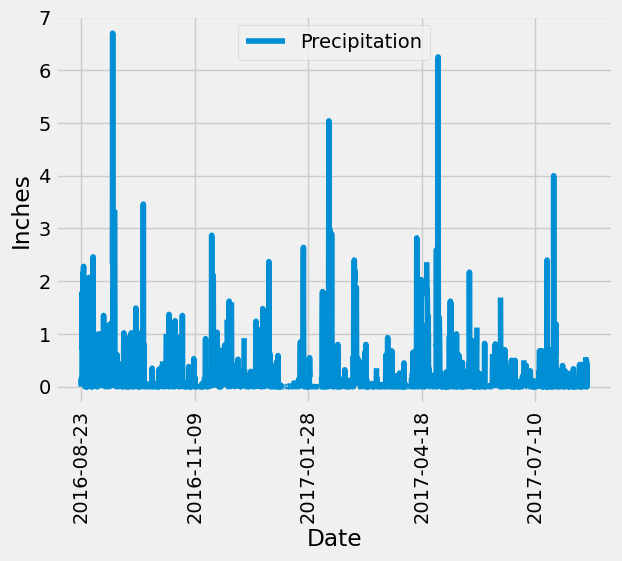

In [40]:
# Use Pandas Plotting with Matplotlib to plot the data
Precipitation.plot(kind = 'line', x='Dates', y= 'Precipitation', xlabel= 'Date', ylabel='Inches', rot=90)

In [42]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = Precipitation.describe()
summary_stats

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [45]:
# Design a query to calculate the total number of stations in the dataset
total_num_stations = session.query(func.count(Station.station)).all()
total_num_stations

[(9,)]

In [46]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = (session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc())).all()

most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [60]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperature = (session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.sum(Measurement.tobs) / func.count(Measurement.tobs)).order_by(Measurement.station).all())

temperature

[(53.0, 87.0, 73.09795396419437)]

In [75]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results_date = session.query(Measurement.date).order_by(Measurement.date.desc()).filter(Measurement.station == most_active_stations[0][0]).first()
string_date = list(np.ravel(results_date))[0]
last_date = dt.datetime.strptime(string_date, "%Y-%m-%d")
back_year = last_date - dt.timedelta(days=365)

plot_results = session.query(Measurement.tobs).filter(Measurement.station == most_active_stations[0][0]).filter(Measurement.date >= back_year).all()

plot_results_df = pd.DataFrame(plot_results)


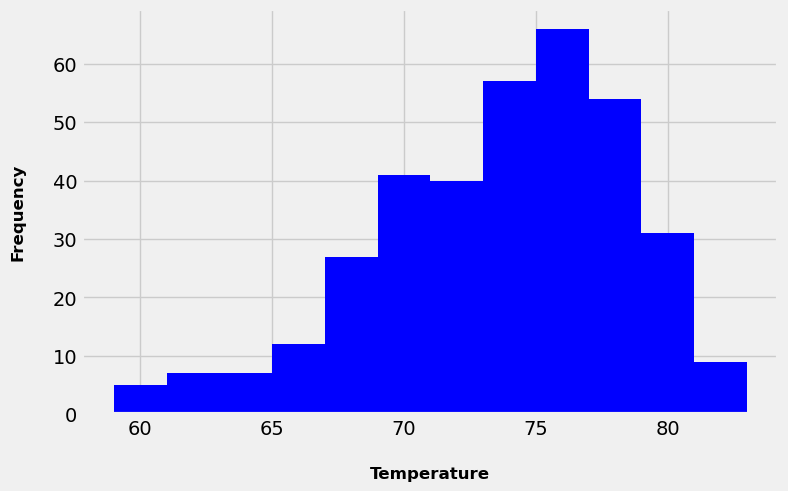

In [76]:
hist = plot_results_df['tobs'].hist(bins=12, figsize=(8,5), color='b', zorder=2)
hist.set_ylabel("Frequency", labelpad= 20, weight='bold', size=12)
hist.set_xlabel("Temperature", labelpad= 20, weight='bold', size=12)

plt.show()

# Close Session

In [77]:
# Close Session
session.close()